# Model Performance Visualization

This notebook visualizes and compares the performance of all trained models using the unified results table. The goal is to clearly identify the best- performing models and understand trade-offs across evaluation metrics.

## Section 1 - Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
DATA_PATH = "../reports/unified_model_results.csv"
results_df = pd.read_csv(DATA_PATH)

results_df

,Model,Accuracy,Precision (Macro),Recall (Macro),F1-score (Macro),ROC-AUC
0,Extra Trees,0.913,0.884,0.884,0.884,0.979
1,Gradient Boosting,0.913,0.884,0.883,0.884,0.979
2,Random Forest,0.912,0.883,0.881,0.882,0.978
3,Logistic Regression,0.899,0.865,0.869,0.867,0.972
4,Gaussian Process,0.892,0.857,0.856,0.857,0.972
5,Adaboost,0.899,0.866,0.866,0.865,0.956
6,K Nearest Neighbors,0.615,0.539,0.552,0.543,0.747
7,Naive Bayes,0.319,0.451,0.396,0.262,0.716
8,Svm Rbf,0.240,0.080,0.333,0.129,0.704
9,Mlp Neural Network,0.514,0.451,0.490,0.430,0.673


## Section 2 - Ensure Numeric Metrics

Metrics are converted to numeric form to allow proper visualization.

In [3]:
metric_cols = [
    "Accuracy",
    "Precision (Macro)",
    "Recall (Macro)",
    "F1-score (Macro)",
    "ROC-AUC"
]

for col in metric_cols:
    results_df[col] = pd.to_numeric(results_df[col], errors="coerce")

## Section 3 - ROC-AUC Comparison Across Models

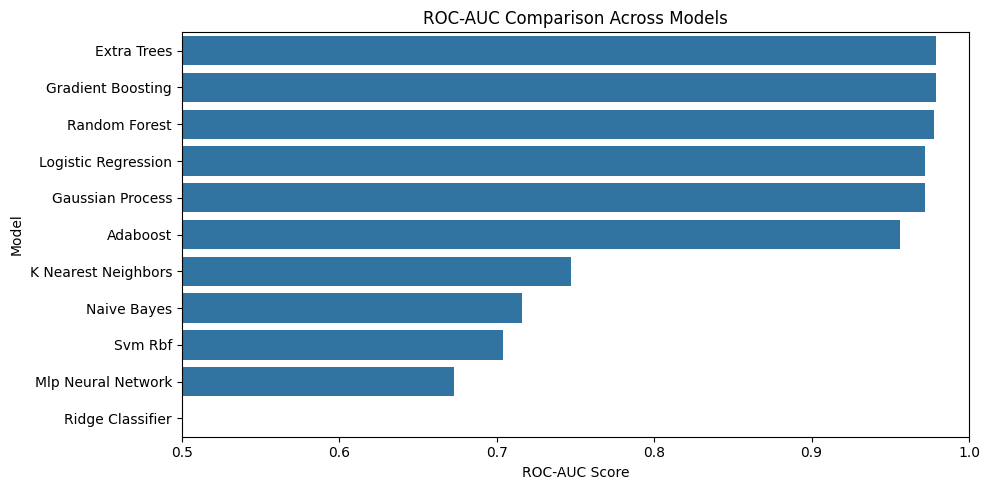

In [4]:
# Bar chart
plt.figure(figsize=(10, 5))
sns.barplot(
    data=results_df.sort_values("ROC-AUC", ascending=False),
    x="ROC-AUC",
    y="Model"
)

plt.title("ROC-AUC Comparison Across Models")
plt.xlabel("ROC-AUC Score")
plt.ylabel("Model")
plt.xlim(0.5, 1.0)
plt.tight_layout()
plt.show()

## Section 4 - Comparison of Core Metrics

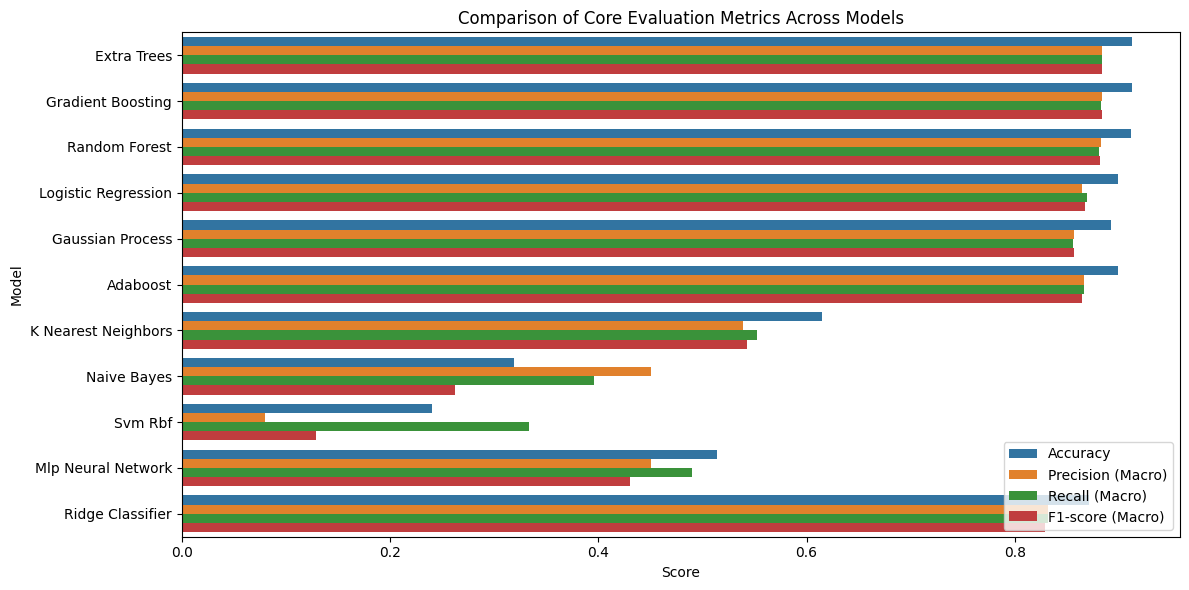

In [5]:
# Grouped bar chart
melted_df = results_df.melt(
    id_vars="Model",
    value_vars=[
        "Accuracy",
        "Precision (Macro)",
        "Recall (Macro)",
        "F1-score (Macro)"
    ],
    var_name="Metric",
    value_name="Score"
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=melted_df,
    x="Score",
    y="Model",
    hue="Metric"
)

plt.title("Comparison of Core Evaluation Metrics Across Models")
plt.xlabel("Score")
plt.ylabel("Model")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

## Section 5 - Radar Chart for Top Performing Models

Radar charts highlight trade-offs between metrics for the best models.

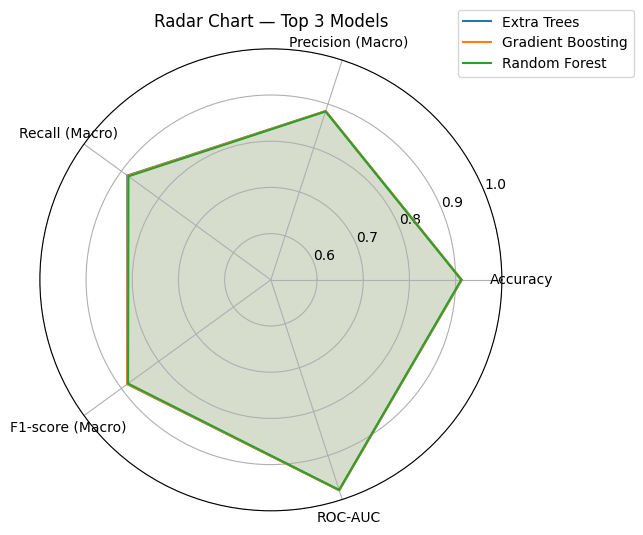

In [6]:
# Select top 3 models by ROC-AUC
top_models = results_df.sort_values(
    "ROC-AUC",
    ascending=False
).head(3)

metrics = ["Accuracy", "Precision (Macro)", "Recall (Macro)", "F1-score (Macro)", "ROC-AUC"]

angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)

for _, row in top_models.iterrows():
    values = row[metrics].tolist()
    values += values[:1]
    ax.plot(angles, values, label=row["Model"])
    ax.fill(angles, values, alpha=0.1)

ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
ax.set_ylim(0.5, 1.0)
plt.title("Radar Chart — Top 3 Models")
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()

## Section 6 - Model Ranking Table

In [7]:
ranked_df = results_df.sort_values(
    "ROC-AUC",
    ascending=False
).reset_index(drop=True)

ranked_df

,Model,Accuracy,Precision (Macro),Recall (Macro),F1-score (Macro),ROC-AUC
0,Extra Trees,0.913,0.884,0.884,0.884,0.979
1,Gradient Boosting,0.913,0.884,0.883,0.884,0.979
2,Random Forest,0.912,0.883,0.881,0.882,0.978
3,Logistic Regression,0.899,0.865,0.869,0.867,0.972
4,Gaussian Process,0.892,0.857,0.856,0.857,0.972
5,Adaboost,0.899,0.866,0.866,0.865,0.956
6,K Nearest Neighbors,0.615,0.539,0.552,0.543,0.747
7,Naive Bayes,0.319,0.451,0.396,0.262,0.716
8,Svm Rbf,0.240,0.080,0.333,0.129,0.704
9,Mlp Neural Network,0.514,0.451,0.490,0.430,0.673


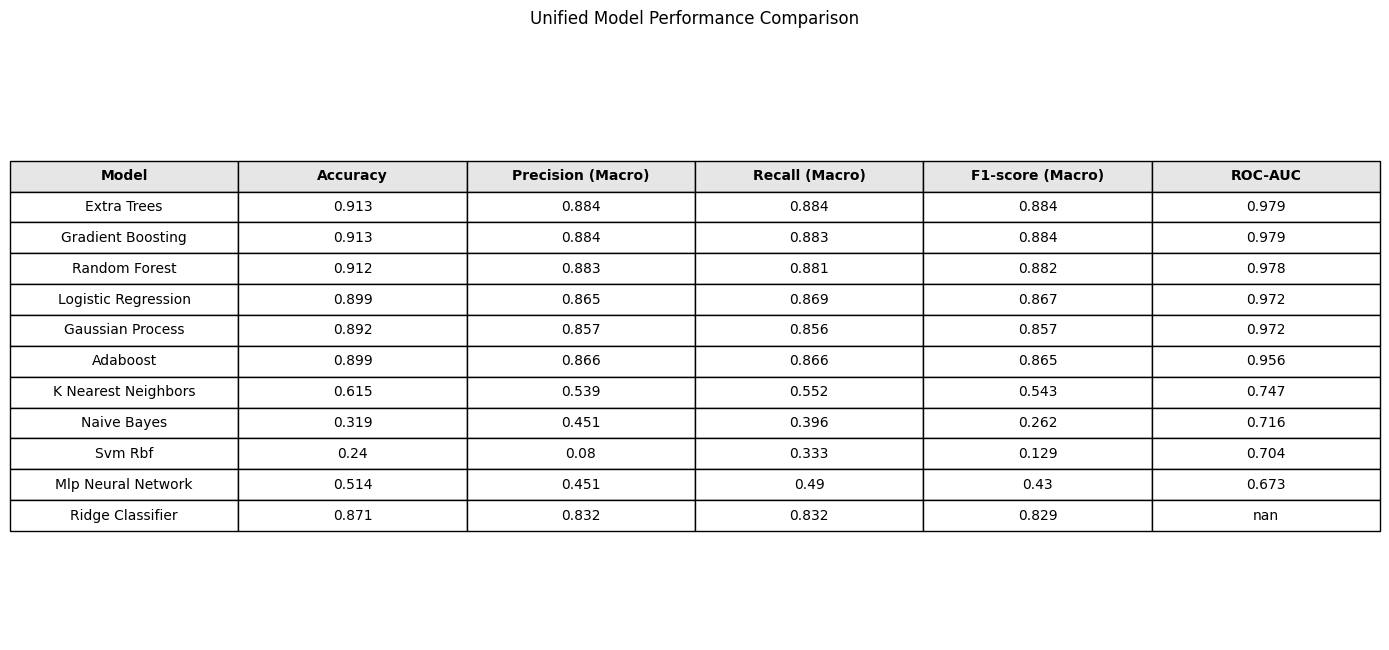

In [8]:
# Create figure
fig, ax = plt.subplots(figsize=(14, 0.6 * len(results_df)))

# Hide axes
ax.axis("off")

# Create table
table = ax.table(
    cellText=results_df.values,
    colLabels=results_df.columns,
    cellLoc="center",
    loc="center"
)

# Styling
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.6)

# Header styling
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(weight="bold")
        cell.set_facecolor("#E6E6E6")

plt.title("Unified Model Performance Comparison", pad=20)
plt.tight_layout()
plt.show()


## Model Performance Interpretation

The results show that ensemble-based models—particularly **Extra Trees**, **Gradient Boosting**, and **Random Forest**—consistently achieve the strongest performance across all evaluation metrics. These models exhibit high accuracy, balanced precision and recall, and the highest ROC-AUC scores, indicating excellent class separability and robustness to non-linear feature interactions.

The baseline **Logistic Regression** performs competitively, confirming that the engineered features carry strong predictive signal, but it is slightly outperformed by tree-based ensembles. Simpler or assumption-heavy models such as **Naive Bayes**, **k-Nearest Neighbors**, and **SVM (RBF)** show noticeably weaker performance, suggesting limited suitability for this dataset. Overall, the visualizations clearly support selecting an ensemble model—particularly Extra Trees or Gradient Boosting—as the final candidate for further analysis or deployment.